In [31]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

In [49]:
transform_normalize = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
cifar10 = dset.CIFAR10('./dataset', train=True, download=True,
                           transform=transform_normalize)

Files already downloaded and verified


In [50]:
print(cifar10.train_data.shape)
print(cifar10.train_labels.__len__())

(50000, 32, 32, 3)
50000


In [2]:
model = torchvision.models.squeezenet1_1(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/keller/.torch/models/squeezenet1_1-f364aa15.pth
100.0%


In [23]:
# image = Variable(torch.FloatTensor(np.zeros((1, 3, 224, 224))))
img = torch.randn(1, 3, 224, 224)
img_var = Variable(img, requires_grad=True)

for _ in range(10):
    scores = model(image)
    objective = scores.squeeze()[500] + 1e-3 * (image**2).sum()
    print(scores.squeeze()[500])
    objective.backward()
    g = image.grad.data
    image.data += 25 * g / g.norm()
    image.grad.zero_()
    
# for _ in range(10):
#     output = model(image)
#     output.backwards()

Variable containing:
 310.2372
[torch.FloatTensor of size 1]

Variable containing:
 316.8354
[torch.FloatTensor of size 1]

Variable containing:
 333.8744
[torch.FloatTensor of size 1]

Variable containing:
 327.2430
[torch.FloatTensor of size 1]

Variable containing:
 337.1315
[torch.FloatTensor of size 1]

Variable containing:
 364.6919
[torch.FloatTensor of size 1]

Variable containing:
 379.3055
[torch.FloatTensor of size 1]

Variable containing:
 369.1133
[torch.FloatTensor of size 1]

Variable containing:
 386.7171
[torch.FloatTensor of size 1]

Variable containing:
 377.0655
[torch.FloatTensor of size 1]



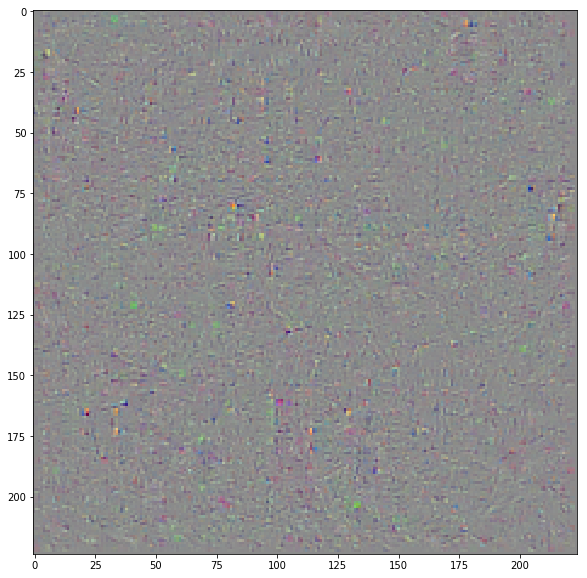

In [17]:
image_shaped = image.squeeze().permute(1, 2, 0).data.numpy()
image_shaped -= image_shaped.min()
image_shaped /= image_shaped.max()

plt.gcf().set_size_inches(10, 10)
plt.imshow(image_shaped)
plt.show()

In [4]:
total = 0
for p in model.parameters():
    total += np.prod(p.size())
print(total)

1235496
